QUESTION 1 

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import mixture
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import math

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: covariance is not symmetric positive-semidefinite.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: covariance is not symmetric positive-semidefinite.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: covariance is not symmetric positive-semidefinite.


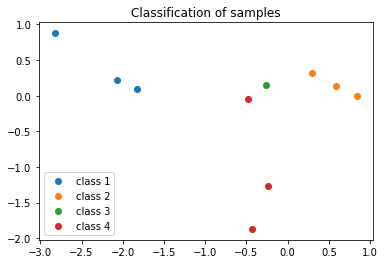

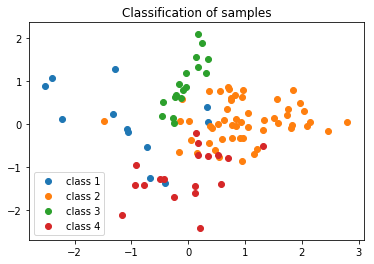

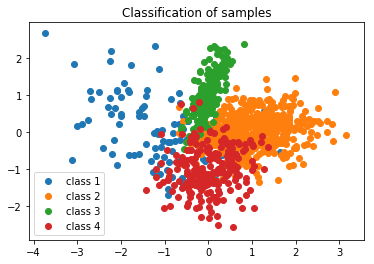

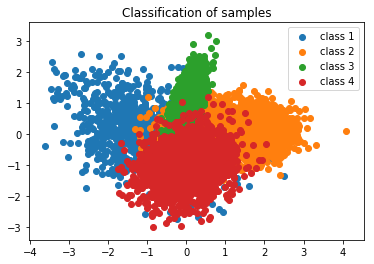

Text(0.5, 1.0, 'For 10000 samples,log likelihood')

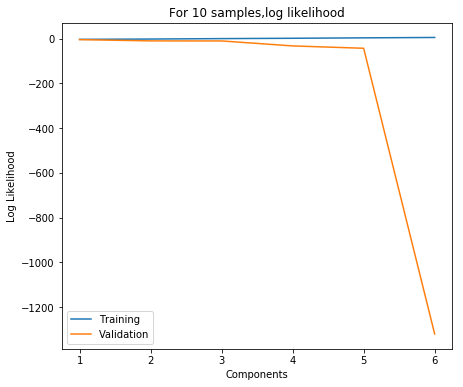

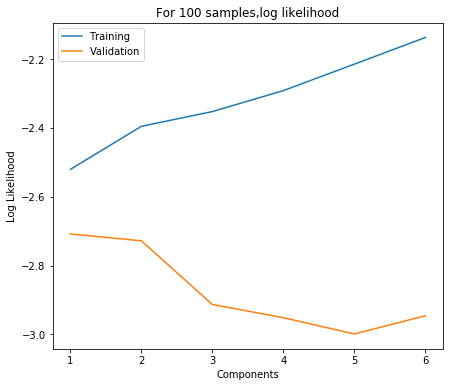

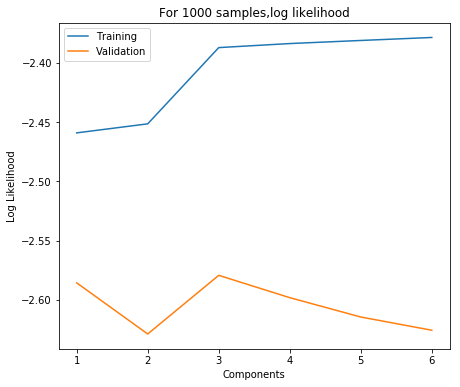

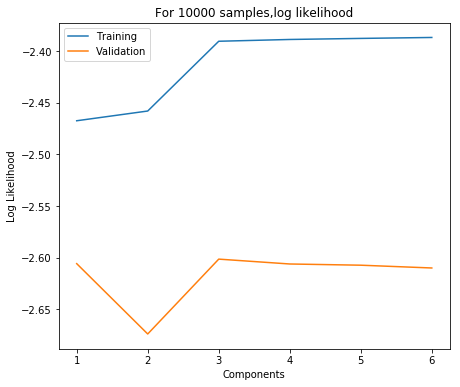

In [235]:
def graphs(i,ts,vs):
    gc=np.array([1,2,3,4,5,6])
    plt.figure(figsize=(7,6))
    plt.plot(gc,ts,label="Training")
    plt.plot(gc,vs,label="Validation")
    plt.xlabel("Components")
    plt.ylabel("Log Likelihood")
    plt.legend()
p=[0.1,0.5,0.19,0.21]
mean1 = np.array([-1,0])
mean2=np.array([1,0])
mean3=np.array([0,1])
mean4=np.array([0,-1])
cov1=np.array([[1,-0.4],[-0.4,0.8]])
cov2=np.array([[0.5,0.02],[0.09,0.2]])
cov3=np.array([[0.1,0.3],[0,0.08]])
cov4=np.array([[0.1,0.4],[0.3,0.05]])
def randgen(size,p):
    k1 = 0
    k2 = 0
    k3 = 0
    a = np.random.choice(4,size,p = [p[0],p[1],p[2],p[3]])
    for i in a:
        if i == 1:
            k1 = k1+1
        if i==2:
            k2=k2+1
        if i==3:
            k3=k3+1
    nsize = [size-k1-k2-k3,k1,k2,k3]
    return(nsize)
def graph(x1,x2,x3,x4):
    plt.scatter(x1[0,:], x1[1,:],label='class 1')
    plt.scatter(x2[0,:], x2[1,:],label='class 2')
    plt.scatter(x3[0,:], x3[1,:],label='class 3')
    plt.scatter(x4[0,:], x4[1,:],label='class 4')
    plt.title("Classification of samples")
    plt.legend()
    plt.show()  
samples=[10,100,1000,10000]
x1=[]
x2=[]
x3=[]
x4=[]
x=[]
for i in range(0,4):
      x.append(randgen(samples[i],p))
for i in range (0,4):
    x1.append(np.random.multivariate_normal(mean1,cov1,(x[i][0])).T)
    x2.append(np.random.multivariate_normal(mean2,cov2,(x[i][1])).T)
    x3.append(np.random.multivariate_normal(mean3,cov3,(x[i][2])).T)
    x4.append(np.random.multivariate_normal(mean4,cov4,(x[i][3])).T)
graph(x1[0],x2[0],x3[0],x4[0])  
graph(x1[1],x2[1],x3[1],x4[1]) 
graph(x1[2],x2[2],x3[2],x4[2]) 
graph(x1[3],x2[3],x3[3],x4[3]) 
point1=np.concatenate((x1[0],x2[0],x3[0],x4[0]),axis=1)
points=point1.reshape(10,2)
cross_val = KFold(n_splits=10)
cross_val.get_n_splits(points)
ts=[]
vs=[]
for a in range(1,7):
    tr=[]
    t=[]
    for tri, ti in cross_val.split(points):
        tr_data, t_data = points[tri], points[ti]
        gauss = mixture.GaussianMixture(n_components=a,covariance_type="full")
        gauss.fit(tr_data)
        tr.append(gauss.score(tr_data))
        t.append(gauss.score(t_data))
    ts.append(np.array(tr).mean())
    vs.append(np.array(t).mean())
graphs(10,ts,vs)
plt.title("For 10 samples,log likelihood")
point1=np.concatenate((x1[1],x2[1],x3[1],x4[1]),axis=1)
points=point1.reshape(100,2)
cross_val = KFold(n_splits=10)
cross_val.get_n_splits(points)
ts=[]
vs=[]
for a in range(1,7):
    tr=[]
    t=[]
    for tri, ti in cross_val.split(points):
        tr_data, t_data = points[tri], points[ti]
        gauss = mixture.GaussianMixture(n_components=a,covariance_type="full")
        gauss.fit(tr_data)
        tr.append(gauss.score(tr_data))
        t.append(gauss.score(t_data))
    ts.append(np.array(tr).mean())
    vs.append(np.array(t).mean())
graphs(100,ts,vs)
plt.title("For 100 samples,log likelihood")
point1=np.concatenate((x1[2],x2[2],x3[2],x4[2]),axis=1)
points=point1.reshape(1000,2)
cross_val = KFold(n_splits=10)
cross_val.get_n_splits(points)
ts=[]
vs=[]
for a in range(1,7):
    tr=[]
    t=[]
    for tri, ti in cross_val.split(points):
        tr_data, t_data = points[tri], points[ti]
        gauss = mixture.GaussianMixture(n_components=a,covariance_type="full")
        gauss.fit(tr_data)
        tr.append(gauss.score(tr_data))
        t.append(gauss.score(t_data))
    ts.append(np.array(tr).mean())
    vs.append(np.array(t).mean())
graphs(1000,ts,vs)
plt.title("For 1000 samples,log likelihood")
point1=np.concatenate((x1[3],x2[3],x3[3],x4[3]),axis=1)
points=point1.reshape(10000,2)
cross_val = KFold(n_splits=10)
cross_val.get_n_splits(points)
ts=[]
vs=[]
for a in range(1,7):
    tr=[]
    t=[]
    for tri, ti in cross_val.split(points):
        tr_data, t_data = points[tri], points[ti]
        gauss = mixture.GaussianMixture(n_components=a,covariance_type="full")
        gauss.fit(tr_data)
        tr.append(gauss.score(tr_data))
        t.append(gauss.score(t_data))
    ts.append(np.array(tr).mean())
    vs.append(np.array(t).mean())
graphs(10000,ts,vs)
plt.title("For 10000 samples,log likelihood")

We see in the above graph that for 10 samples, the maximum likelihood is at around 2.8.
For 100, it goes to 2.
For 1000, it's at 3.
for 10000, it further increases to 3.2. 
Thus, in general, as the number of samples increases, the log likelihood increases.

QUESTION 2

MAP CLASSIFIER

 CONFUSION MATRIX

         Class 1  Class 2
Class 1      277       99
Class 2       23      600


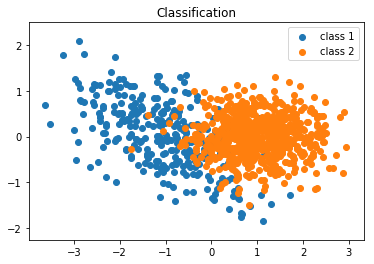

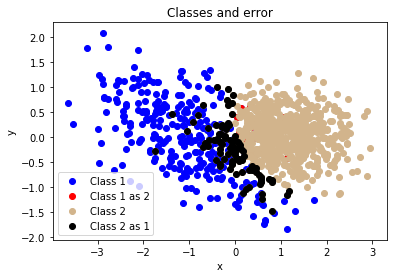

Probability of error of MAP: 0.12212212212212212


In [221]:
def randgen(size, p): 
    k1 = 0
    a = np.random.choice(2,size,p = [p[0],p[1]])
    for i in a:
        if i == 1:
            k1 = k1+1
    nsize = [size-k1,k1]
    return(nsize)
size=999
p=[0.3,0.7]
n=randgen(size,p)
mean1=np.array([-1,0])
m1=mean1.reshape(2,1)
cov1=np.array([[1,-0.4],[-0.4,0.5]])
mean2=np.array([1,0])
m2=mean2.reshape(2,1)
cov2=np.array([[0.5,0],[0,0.2]])
x1= np.random.multivariate_normal(mean1,cov1,n[0]).T
x2=np.random.multivariate_normal(mean2,cov2,n[1]).T
gx11=np.diag((-1/2)*(x1-m1).T@(np.linalg.inv(cov1))@(x1-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.3)
gx12=np.diag((-1/2)*(x2-m1).T@(np.linalg.inv(cov1))@(x2-m1))-(1/2)*np.linalg.det(cov1)+(1/2)*np.log(0.7)
gx21=np.diag((-1/2)*(x1-m2).T@(np.linalg.inv(cov2))@(x1-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.3)
gx22=np.diag((-1/2)*(x2-m2).T@(np.linalg.inv(cov2))@(x2-m2))-(1/2)*np.linalg.det(cov2)+(1/2)*np.log(0.7)
c11=[]
c22=[]
c33=[]
v11a=[]
v11=[]
v22=[]
v22a=[]
v33=[]
v33a=[]
p11=(gx21-gx11)
t1a=((gx11>gx21))
t1b=((gx21>gx11))
p21=(gx12-gx22)
t2a=((gx12>gx22))
t2b=((gx22>gx12))
p11 = p11.reshape([p11.size])
p21 = p21.reshape([p21.size])
a=np.array([[t1a.sum(),t1b.sum()],[t2a.sum(),t2b.sum()]])
ax11a=[]
ay11a=[]
ax22a = []
ay22a = []
for i in range(0,len(p11)):
    if p11[i]<0: #g11>g21 
        c11.append(i)  #class 1
    else:             #class 1 as 2
            v11a.append(i)
for i in range(0,len(p21)):
    if p21[i]<0: 
        c22.append(i)  #class2
    else: #class 2 as 1
            v22a.append(i)
G1=[t1a.sum(),t1b.sum()]
G2=[t2a.sum(),t2b.sum()]
data = {'Class 1': G1, 'Class 2': G2}
df = pd.DataFrame(data=data,index=['Class 1','Class 2'])
print("\033[1;33;40m CONFUSION MATRIX\n")
print(df)
b11a= [x1[:,i] for i in v11a]
b22a= [x2[:,i] for i in v22a]
for i in b11a:
    ax11a.append(i[0])
    ay11a.append(i[1])
for i in b22a:
    ax22a.append(i[0])
    ay22a.append(i[1])
plt.scatter(x1[0,:], x1[1,:],label='class 1')
plt.scatter(x2[0,:], x2[1,:],label='class 2')
plt.axis('equal')
plt.title('Classification')
plt.legend()
plt.show()
plt.scatter(x1[0,:], x1[1,:], color = "blue",label='Class 1')
plt.scatter(ax11a,ay11a,color="red", label='Class 1 as 2')
plt.scatter(x2[0,:], x2[1,:],color="tan",label='Class 2')
plt.scatter(ax22a,ay22a,color='black', label='Class 2 as 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Classes and error')
plt.legend()
plt.show()
print("Probability of error of MAP:",(len(b11a)+len(b22a))/999)

FISHER LDA

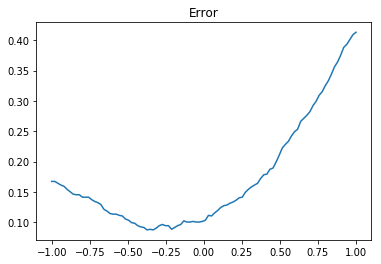

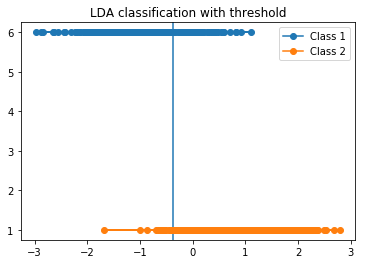

Probability of error in Fisher LDA: 0.8771387696709586


In [224]:
m1=np.array([np.mean(x1[0,:].T),np.mean(x1[1,:].T)])
m1=m1.reshape(-1,1)
m2=np.array([np.mean(x2[0,:].T),np.mean(x2[1,:].T)])
m2=m2.reshape(-1,1)
sb=(m1-m2)@(m1-m2).T
q=np.linspace(-1,1,100)
e=[]
sw=(np.cov(x1)/2)+(np.cov(x2)/2)
h=np.linalg.inv(sw)@sb
j,k=np.linalg.eig(h)
j=k[:,np.argmax(np.array(j))]
y1=j.T@x1
y2=j.T@x2
y1=np.array(y1)
y2=np.array(y2)
for i in (q):
    l1_1=y1[y1<=i]
    l1_2=y1[y1>i]
    l2_2=y2[y2>=i]
    l2_1=y2[y2<i]
    e.append((len(l1_2)+len(l2_1))/999)
plt.plot(q,e)
plt.title("Error")
plt.show()
min_e=np.argmin(np.array(e)) 
t=q[min_e]
ya=[6 for x in range(x1.shape[1])]
yb=[1 for x in range(x2.shape[1])]
plt.axvline(x=t)
plt.plot(y1,ya,label="Class 1",marker='o')
plt.plot(y2,yb, label="Class 2",marker='o')
plt.legend()
plt.title("LDA classification with threshold")
plt.plot()
plt.show()
c1=0
c2=0
l1=len(y1)
l2=len(y2)
for i in range(l1):
    if(y1[i]>threshold):
        c1=c1+1
for i in range(l2):
    if(y2[i]<threshold):
        c=c+1
miss=(count/l1)+(c/l2)
print("Probability of error in Fisher LDA:", miss)

LOGISTIC REGRESSION

In [225]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1.T,(np.zeros(x1.shape[1])).reshape(x1.shape[1],1) , test_size=0.1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2.T,(np.zeros(x2.shape[1])).reshape(x2.shape[1],1) , test_size=0.1)
X_tr_arr=np.vstack((X_train1,X_train2))
X_ts_arr=np.vstack((X_test1,X_test2))
y_tr_arr=np.vstack((y_train1,y_train2))
y_ts_arr=np.vstack((y_test1,y_test2))
n = X_tr_arr.shape[1]
w = np.zeros((1,n))
b = 0
alpha=0.00005
iter1=500
costs = []
for i in range(iter1):
    m = X_tr_arr.shape[0]
    final_result = 1/(1+np.exp(np.dot(w,X_tr_arr.T)+b))
    Y_T = y_tr_arr.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    dw = (1/m)*(np.dot(X_tr_arr.T, (final_result-y_tr_arr.T).T))
    db = (1/m)*(np.sum(final_result-y_tr_arr.T))
    grads = {"dw": dw, "db": db}
    dw = grads["dw"]
    db = grads["db"]
    w = w + (alpha * (dw.T))
    b = b + (alpha * db)
    if (i % 100 == 0):
        costs.append(cost)
coeff = {"w": w, "b": b}
gradient = {"dw": dw, "db": db}
w = coeff["w"]
b = coeff["b"]
print('Optimimum weight:', w)
print('Optimum bias:',b)
final_test_pred = 1/(1+np.exp(np.dot(w,X_ts_arr.T)+b))
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
y_ts_pred = predict(final_test_pred, m_ts)
print("cost is:", cost)
print('probability of error of logistic regression is ',1-accuracy_score(y_ts_pred.T, y_ts_arr))

Optimimum weight: [[0.00447467 0.00017306]]
Optimum bias: 0.012456048909913052
Training Accuracy 0.9833147942157954
cost is: 0.6861528637324097
probability of error of logistic regression is  0.020000000000000018


Thus, we see that logistic regression gives the minimum error, then MAP classifier and then LDA. Hence logisitc regression works the best.